# Cell Cycle Data

Import the cell cycle dataset excel spreadsheet (using Pandas). You may need to do some tidying of the data such as dropping rows with missing NaN values.

In [15]:
# import neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

df = pd.read_excel('Cell-Cycle-Set.xlsx')
# curate to drop columns with missing values
df.dropna(inplace=True)
# No cells containing "NaN"

# Week 1

## Task 1

Generate a histogram of one of the cell cycle stages of the RNA and protein distribution. Do you notice anything interesting with regards to the mean/variance of the distribution?

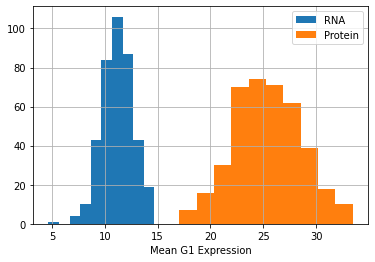

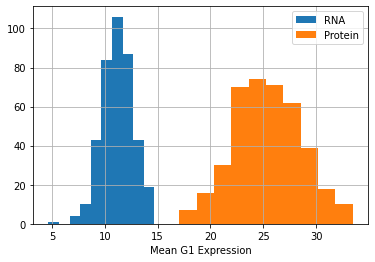

In [16]:
fig1, ax1 = plt.subplots()
df.mean_RNA_G1.hist(ax=ax1, label='RNA')
df.mean_protein_G1.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')
fig1

Observations:
- During phase G1 of the cell cycle, the mean RNA concetrations are signficantly less than the mean protein concentrations. With the most common RNA concentration being approximately 11 whilst the most common protein concentration is 24.
- The varience of RNA concentration is noticably smaller compared to varience of protein concentration 

## Task 2

Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?

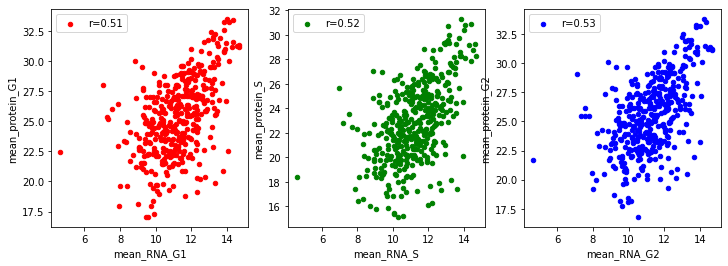

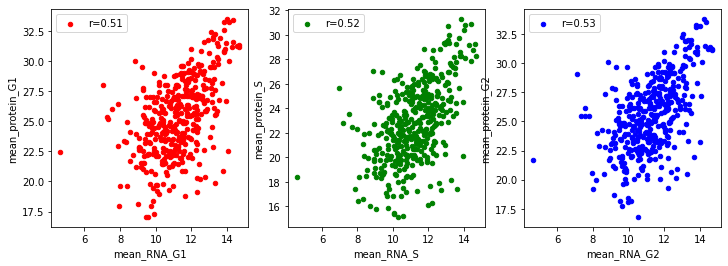

In [24]:
fig2, ax2 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[0], color='r', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[1], color='g', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[2], color='b', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))

fig2


- In each of the three phases of the cell cycle, the trends are very similar with spearmans rank (r) values remaining relatively consistent between phases.
- There is a clear postive linear correlation.'
ADDITIONAL OBSERVATIONS:


## Task 3 

Generate a scatterplot of the RNA versus. protein for each cell cycle stage. Fit a linear model to the data, can we infer protein concentration from RNA concentration?

C:\Users\Ed\AppData\Local\Temp\ipykernel_24172\3614895039.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df.columns, rotation=90)
C:\Users\Ed\AppData\Local\Temp\ipykernel_24172\3614895039.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(df.columns)


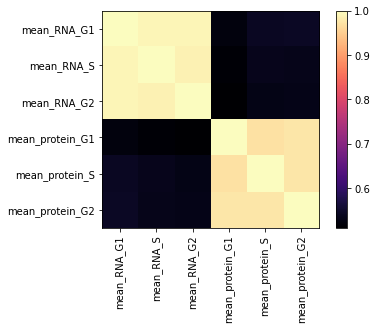

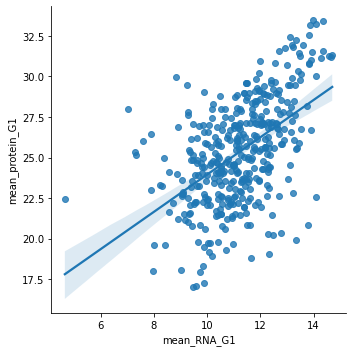

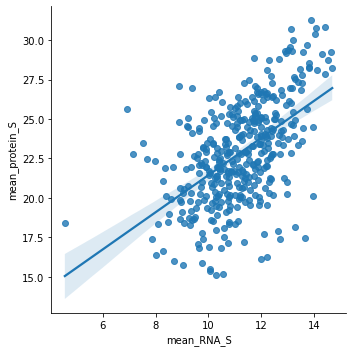

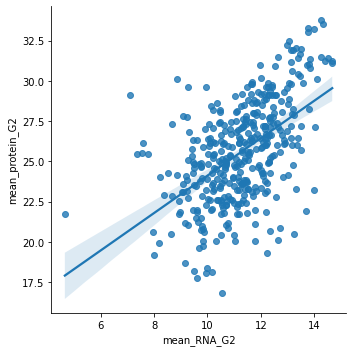

In [25]:
fig3,ax3 = plt.subplots()
cax = ax3.imshow(df.corr(), cmap='magma')
ax3.set_xticklabels(df.columns, rotation=90)
ax3.set_yticklabels(df.columns)
fig3.colorbar(cax)
fig3


sns.lmplot(x='mean_RNA_G1', y='mean_protein_G1',data=df,fit_reg=True)
sns.lmplot(x='mean_RNA_S', y='mean_protein_S',data=df,fit_reg=True) 
sns.lmplot(x='mean_RNA_G2', y='mean_protein_G2',data=df,fit_reg=True) 


- As we can see with the heatmap, the diagonal (from top left to bottom right) is all white. However, this is due to the two variables compared here are the exact same variables - so no conclusion can be drawn from this
- The top left quarter of the heat map displays light colours, showing that the RNA concentrations are very closely linked to one another regardless of stage of the cell cycle. Likewise, the bottom right quarter displays light colours, showing that protein concentrations are very closely linked to one another regardless of stage of the cell cycle.
- The bottom left and top right quarters display very dark colours, showing us that RNA concentration cannot be inferred from protein concentration and vice versa at each stage of the cell cycle. 
- After plotting the regression lines of each graph, we can clearly see that the sum of squared rediduals would be relatively large for each graph. This shows us that a regression line would likely be inaccurate, indicating that although a clear trend between protein and rna concentrations, using the data as a model to predict protein concentration from RNA concentration (and vice versa) would likely be innaccurate.

# Week 2

## Task 1

Find all genes that contain 'cell cycle' in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase. Is there a stronger/weaker correlation?

71


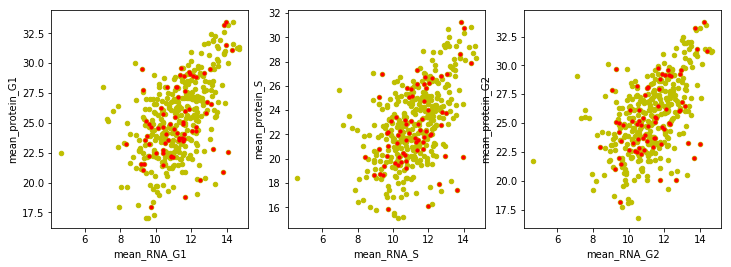

In [11]:
gobp = df[df.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='y')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='y')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='y')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print(len(gobp))
fig4

## Task 2

71


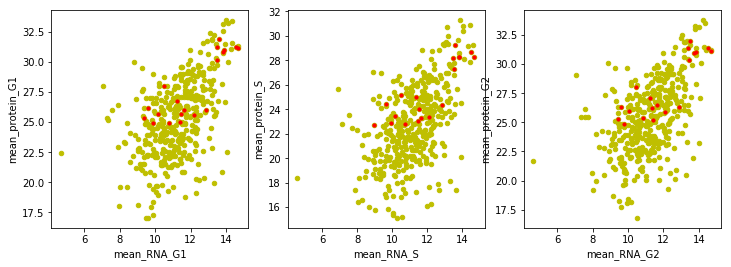

In [12]:
gocc = df[df.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='y')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='y')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='y')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gobp))
fig5

## Task 3

Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?

In [7]:
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                                                                         377
metabolic process                                                                        273
cellular metabolic process                                                               260
primary metabolic process                                                                255
biological regulation                                                                    236
regulation of biological process                                                         225
macromolecule metabolic process                                                          211
regulation of cellular process                                                           211
cellular macromolecule metabolic process                                                 201
nitrogen compound metabolic process                                                      167
cellular nitrogen compound metabolic process                          

## Task 4

Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?

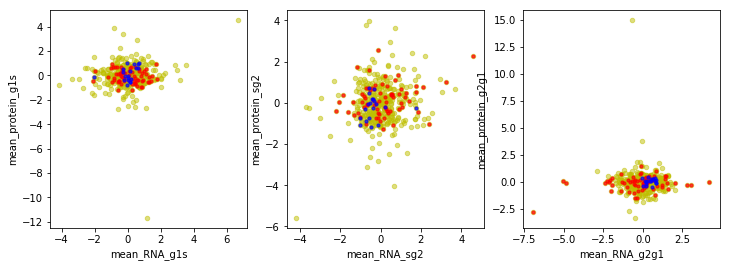

In [14]:
df['mean_RNA_g1s'] = (df.mean_RNA_S - df.mean_RNA_G1)
df['mean_RNA_sg2'] = (df.mean_RNA_G2 - df.mean_RNA_S)
df['mean_RNA_g2g1'] = (df.mean_RNA_G1 - df.mean_RNA_G2)
df['mean_protein_g1s'] = (df.mean_protein_S - df.mean_protein_G1)
df['mean_protein_sg2'] = (df.mean_protein_G2 - df.mean_protein_S)
df['mean_protein_g2g1'] = (df.mean_protein_G1 - df.mean_protein_G2)

# standardise
df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]
fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], color='y', alpha=.5)
df.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], color='y',alpha=.5)
df.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], color='y', alpha=.5)
ax6[0].scatter(gobp.mean_RNA_g1s, gobp.mean_protein_g1s, color='r', s=10., alpha=.7)
ax6[1].scatter(gobp.mean_RNA_sg2, gobp.mean_protein_sg2, color='r', s=10., alpha=.7)
ax6[2].scatter(gobp.mean_RNA_g2g1, gobp.mean_protein_g2g1, color='r', s=10., alpha=.7)
ax6[0].scatter(gocc.mean_RNA_g1s, gocc.mean_protein_g1s, color='b', s=10., alpha=.7)
ax6[1].scatter(gocc.mean_RNA_sg2, gocc.mean_protein_sg2, color='b', s=10., alpha=.7)
ax6[2].scatter(gocc.mean_RNA_g2g1, gocc.mean_protein_g2g1, color='b', s=10., alpha=.7)
fig6